In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

In [2]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

    # We create an extractor object:
extractor = twitter_setup()

In [3]:
# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="Jokowi", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Bocah kecil pemberani ini saya temui di lokasi pengungsian di kota Palu. Ibunya meninggal, ayahnya dirawat karena l… https://t.co/Z4JQi1cQgf

Area bekas permukiman warga di Petobo, Palu. Proses evakuasi, pembersihan, dan pencarian korban di Palu telah berja… https://t.co/qvOHQXVa5E

Yang terpenting dalam situasi pascabencana adalah penanganan cepat! Untuk itu, saya telah menunjuk Bapak Jusuf Kall… https://t.co/AlJSsqOikK

Melepas kontingen Indonesia yang akan turun berlaga di Asian Para Games 2018 di Jakarta. Sebagai tuan rumah, Indone… https://t.co/Tce67wE2Hc

Raja Arab Saudi Salman bin Abdulaziz menelepon saya, berbelasungkawa atas bencana gempa bumi dan tsunami di Sulawes… https://t.co/LlYqmbTmwy



In [4]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))


,Tweets
0,Bocah kecil pemberani ini saya temui di lokasi...
1,"Area bekas permukiman warga di Petobo, Palu. P..."
2,Yang terpenting dalam situasi pascabencana ada...
3,Melepas kontingen Indonesia yang akan turun be...
4,Raja Arab Saudi Salman bin Abdulaziz menelepon...
5,Memimpin upacara Peringatan Hari Kesaktian Pan...
6,"Seharian meninjau sejumlah titik di Kota Palu,..."
7,"Duka rakyat Sulawesi Tengah, duka kita semua. ..."
8,Puing-puing bangunan Perumnas Balaroa di Palu ...
9,"Bertolak dari Pangkalan TNI AU Adi Soemarmo, S..."


In [5]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [6]:
 We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

SyntaxError: invalid syntax (<ipython-input-6-4d02498fee46>, line 1)

In [7]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1047493968924094467
2018-10-03 14:29:58
Twitter for Android
6981
4049
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Z4JQi1cQgf', 'expanded_url': 'https://twitter.com/i/web/status/1047493968924094467', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [8]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Display of first 10 elements from dataframe:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs
0,Bocah kecil pemberani ini saya temui di lokasi...,140,1047493968924094467,2018-10-03 14:29:58,Twitter for Android,6981,4049
1,"Area bekas permukiman warga di Petobo, Palu. P...",140,1047415436122279936,2018-10-03 09:17:54,Twitter for Android,7442,2730
2,Yang terpenting dalam situasi pascabencana ada...,140,1047313446675464193,2018-10-03 02:32:38,Twitter for Android,6855,1969
3,Melepas kontingen Indonesia yang akan turun be...,140,1047065303694413827,2018-10-02 10:06:36,Twitter for Android,6851,1894
4,Raja Arab Saudi Salman bin Abdulaziz menelepon...,140,1046935259709763584,2018-10-02 01:29:51,Twitter for Android,20370,7875
5,Memimpin upacara Peringatan Hari Kesaktian Pan...,140,1046695308460089344,2018-10-01 09:36:22,Twitter for Android,6443,1665
6,"Seharian meninjau sejumlah titik di Kota Palu,...",140,1046605977359769600,2018-10-01 03:41:24,Twitter for Android,12735,5309
7,"Duka rakyat Sulawesi Tengah, duka kita semua. ...",140,1046398953124560896,2018-09-30 13:58:46,Twitter for Android,17022,6671
8,Puing-puing bangunan Perumnas Balaroa di Palu ...,140,1046310485665050624,2018-09-30 08:07:13,Twitter for Android,9601,3011
9,"Bertolak dari Pangkalan TNI AU Adi Soemarmo, S...",140,1046252996428886019,2018-09-30 04:18:47,Twitter for Android,17131,5506


In [9]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 138.51


In [10]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Usai merebut medali emas, pesilat Hanifan Yudani Kusumah berlari keliling lalu naik ke tempat saya duduk bersama Ke… https://t.co/L9PFzRaA0y
Number of likes: 49430
140 characters.

The tweet with more retweets is: 
Usai merebut medali emas, pesilat Hanifan Yudani Kusumah berlari keliling lalu naik ke tempat saya duduk bersama Ke… https://t.co/L9PFzRaA0y
Number of retweets: 31004
140 characters.



In [11]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

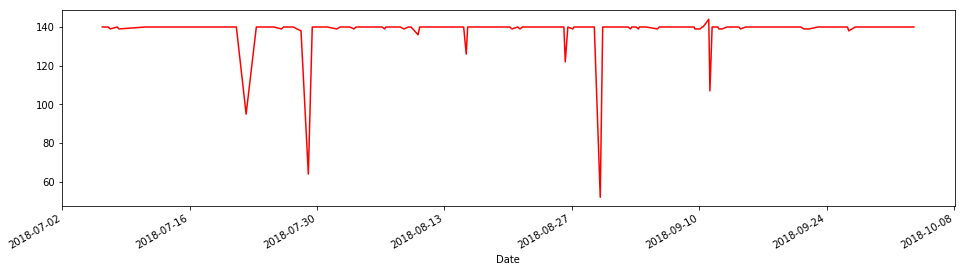

In [12]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r')

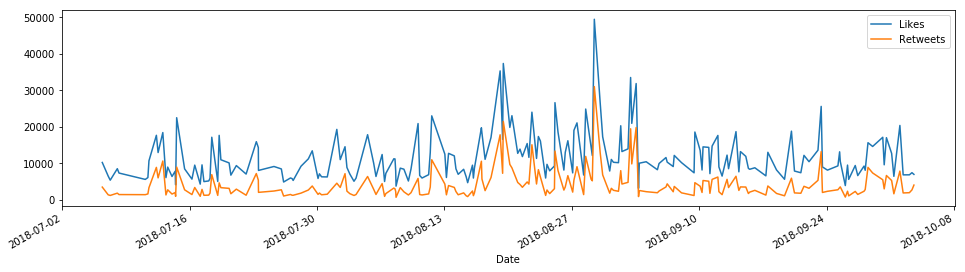

In [13]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


In [14]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))


Creation of content sources:
* Twitter for Android
* Twitter Web Client


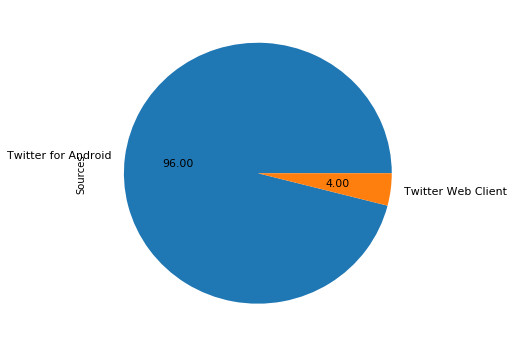

In [15]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));


In [16]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [17]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Bocah kecil pemberani ini saya temui di lokasi...,140,1047493968924094467,2018-10-03 14:29:58,Twitter for Android,6981,4049,0
1,"Area bekas permukiman warga di Petobo, Palu. P...",140,1047415436122279936,2018-10-03 09:17:54,Twitter for Android,7442,2730,0
2,Yang terpenting dalam situasi pascabencana ada...,140,1047313446675464193,2018-10-03 02:32:38,Twitter for Android,6855,1969,0
3,Melepas kontingen Indonesia yang akan turun be...,140,1047065303694413827,2018-10-02 10:06:36,Twitter for Android,6851,1894,0
4,Raja Arab Saudi Salman bin Abdulaziz menelepon...,140,1046935259709763584,2018-10-02 01:29:51,Twitter for Android,20370,7875,0
5,Memimpin upacara Peringatan Hari Kesaktian Pan...,140,1046695308460089344,2018-10-01 09:36:22,Twitter for Android,6443,1665,0
6,"Seharian meninjau sejumlah titik di Kota Palu,...",140,1046605977359769600,2018-10-01 03:41:24,Twitter for Android,12735,5309,0
7,"Duka rakyat Sulawesi Tengah, duka kita semua. ...",140,1046398953124560896,2018-09-30 13:58:46,Twitter for Android,17022,6671,0
8,Puing-puing bangunan Perumnas Balaroa di Palu ...,140,1046310485665050624,2018-09-30 08:07:13,Twitter for Android,9601,3011,0
9,"Bertolak dari Pangkalan TNI AU Adi Soemarmo, S...",140,1046252996428886019,2018-09-30 04:18:47,Twitter for Android,17131,5506,0


In [18]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [19]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 2.0%
Percentage of neutral tweets: 96.0%
Percentage de negative tweets: 2.0%
